In [ ]:
#@title <font size="3"> CORRER SIEMPRE: LIBRERIAS
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Circle, Rectangle
from matplotlib import colormaps
from scipy.optimize import curve_fit
from scipy.stats import linregress
from PIL import Image

# OPCIONAL
import scienceplots
plt.style.use("science")
plt.rcParams["figure.dpi"] = 200
texto_pt = 10 #@param
plt.rcParams['font.size'] = texto_pt
cm = 1/2.54  # factor de conversion a cm
proporciones = (8.5*cm, 5*cm) # dimension de las figuras
plt.rcParams['figure.figsize'] = proporciones

In [ ]:
#@title <font size="3"> # CORRER opc: descargas
!pip install scienceplots
!pip install openpiv
!pip install latex
!apt-get install texlive-latex-base
!pip install type1ec
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 21.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for latex: filename=latex-0.7.0-py3-none-any.whl size=7588 sha256=fe6182ae446d48daf5cd2a2ad658f3a7fe8f2e78fb1f7a1359c5d59f412fa4dd
  Stored in directory: /root/.cache/pip/wheels/7e/02/25/c00dfc203e8ba53dfc2e4e97d40e537263d6e03606681f3872
  Created wheel for data: filename=data-0.4-py3-none-any.whl size=7227 sha256=766cea79c6f4f1cad08b8520698a814b4890a0372f99fe295ad15113d67ab0db
  Stored in directory: /root/.cache/pip/wheels/d0/e8/fa/e253c256048ea58d99a8abb5e751abb6a838af6f12887b5418
  Created wheel for shutilwhich: filename=shutilwhich-1.1.0-py3-none-any.whl size=2763 sha256=1052c8118d537a4299015d197b3c72102c9ae72960e441ea4cb1eab34c3c5a82
  Stored in directory: /root/.cache/pip/wheels/75/1f/1c/0ecab7ceabad0b8e018891505911e82a6f35

In [ ]:
#@title <font size="3"> MONTURA DRIVE
from google.colab import drive
drive.mount('/content/drive/')
%cd "/content/drive/MyDrive/Labo 5/Fluidos/fluidos profe/Fluidos"
%ls

Mounted at /content/drive/
/content/drive/.shortcut-targets-by-id/118JYUXroIqW054F5eOLPzLWxDcE-6i0X/Labo 5/Fluidos/fluidos profe/Fluidos
 analisis/                        ffmpeg-colab/      'Sin título.png'
 codigo/                          interface.ipynb    'Teorema del circulo.jpg'
'Copia de 37% glicerina .ipynb'  'Sin título 2.png'   videos-sin-procesar/


In [ ]:
#@title <font size="3"> MONTURA DRIVE
from google.colab import drive
drive.mount('/content/drive/')
%cd "/content/drive/MyDrive/laburo"
%ls

Mounted at /content/drive/
/content/drive/MyDrive/laburo
'camara requisitos.mp4'


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
!pip install tensorflow-addons
!pip install tensorflow-addons[image]
!pip install tensorflow-addons[image]==0.18.0
import tensorflow_addons.image as tfa_image
# Cargar el modelo DeepLabV3 preentrenado
model = tf.keras.applications.DenseNet201(weights='imagenet', include_top=False)

# Función para preprocesar la imagen para el modelo
def preprocess_image(image):
    image = cv2.resize(image, (224, 224))
    image = tf.keras.applications.densenet.preprocess_input(image)
    image = tf.expand_dims(image, 0)
    return image

import tensorflow_addons as tfa

# ...

# Función para obtener la máscara de segmentación
def get_segmentation_mask(image):
    image = preprocess_image(image)
    prediction = model.predict(image)
    mask = tf.argmax(prediction, axis=-1)
    mask = tfa.image.convert_image_dtype(mask, tf.uint8)
    return mask[0]

# ...
# Función para obtener la máscara de segmentación


# Función para aplicar la máscara al video
def remove_background(video_path, output_path):
    cap = cv2.VideoCapture(video_path)
    width = int(cap.get(3))
    height = int(cap.get(4))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, 20.0, (width, height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Obtener la máscara de segmentación
        mask = get_segmentation_mask(frame)

        # Aplicar la máscara para eliminar el fondo
        result = cv2.bitwise_and(frame, frame, mask=mask.astype(np.uint8))

        out.write(result)

        cv2.imshow('Video con fondo eliminado', result)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    cap.release()
    out.release()
    cv2.destroyAllWindows()

# Ruta del video de entrada
video_path = 'camara requisitos.mp4'

# Ruta del video de salida
output_path = 'video_sin_fondo.mp4'

# Eliminar el fondo y guardar el nuevo video
remove_background(video_path, output_path)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.7 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-addons
    Found existing installation: tensorflow-addons 0.23.0
    Uninstalling tensorflow-addons-0.23.0:
      Successfully uninstalled tensorflow-addons-0.23.0


1/1 [==============================] - 5s 5s/step


AttributeError: module 'tensorflow_addons.image' has no attribute 'convert_image_dtype'

In [ ]:
#@title <font size="3">← ឵឵<i>Upgrade FFmpeg to v5.0</font> { vertical-output: true }
import os, uuid, re, IPython
import ipywidgets as widgets
import time

from glob import glob
from google.colab import output, drive

from IPython.display import clear_output
import os, sys, urllib.request
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'
if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/yunooooo/gcct/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    loadingAn,
    textAn,
)

loadingAn(name="lds")
textAn("Cloning Repositories...", ty='twg')
!git clone https://github.com/XniceCraft/ffmpeg-colab.git
!chmod 755 ./ffmpeg-colab/install
textAn("Installing FFmpeg...", ty='twg')
!./ffmpeg-colab/install
clear_output()
print('Installation finished!')
!rm -fr /content/ffmpeg-colab
!ffmpeg -version

Installation finished!
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
configuration: --prefix=/home/ffmpeg-builder/release --pkg-config-flags=--static --extra-libs=-lm --disable-doc --disable-debug --disable-shared --disable-ffprobe --enable-static --enable-gpl --enable-version3 --enable-runtime-cpudetect --enable-avfilter --enable-filters --enable-nvenc --enable-nvdec --enable-cuvid --toolchain=hardened --disable-stripping --enable-opengl --pkgconfigdir=/home/ffmpeg-builder/release/lib/pkgconfig --extra-cflags='-I/home/ffmpeg-builder/release/include -static-libstdc++ -static-libgcc ' --extra-ldflags='-L/home/ffmpeg-builder/release/lib -fstack-protector -static-libstdc++ -static-libgcc ' --extra-cxxflags=' -static-libstdc++ -static-libgcc ' --extra-libs='-ldl -lrt -lpthread' --enable-ffnvcodec --enable-gmp --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfdk-aac --enable-libfontconfig --e

In [ ]:
#@title <font size="3"> *You can ignore this*
import os, sys, re
media_file_path = "/content/drive/MyDrive/Labo 5/Fluidos/fluidos profe/Fluidos/videos-sin-procesar/50v1g.MOV" #@param {type:"string"}
os.environ['inputFile'] = media_file_path
!ffmpeg -i "$inputFile" -hide_banner

/content/drive/MyDrive/Labo 5/Fluidos/fluidos profe/Fluidos/videos-sin-procesar/50v1g.MOV: No such file or directory


In [ ]:
#@title <font size="3"> *Conversor MOV - MP4*

import os, sys, re

# Define the variables
video_file_path = "/content/drive/MyDrive/Labo 5/Fluidos/fluidos profe/Fluidos/videos-sin-procesar/Qb.MOV" #@param {type:"string"}
start_time = 0 #@param {type:"number"}
end_time = 10 #@param {type:"number"}

# Extract the output file path
output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)

# Extract the filename and extension
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

# Set the environment variables
os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['startTime'] = str(start_time)
os.environ['endTime'] = str(end_time)
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

# Execute the ffmpeg command
!ffmpeg -hide_banner -i "$inputFile" -c copy -strict -2 "$outputPath"/"$fileName".mp4


Input #0, mov,mp4,m4a,3gp,3g2,mj2, from '/content/drive/MyDrive/Labo 5/Fluidos/fluidos profe/Fluidos/videos-sin-procesar/Qb.MOV':
  Metadata:
    major_brand     : qt  
    minor_version   : 0
    compatible_brands: qt  
    creation_time   : 2024-02-23T13:31:26.000000Z
    com.apple.quicktime.make: Apple
    com.apple.quicktime.model: iPhone XS Max
    com.apple.quicktime.software: 16.3.1
    com.apple.quicktime.creationdate: 2024-02-23T10:31:26-0300
  Duration: 00:00:03.20, start: 0.000000, bitrate: 16292 kb/s
  Stream #0:0[0x1](und): Video: h264 (High) (avc1 / 0x31637661), yuv420p(tv, bt709, progressive), 1920x1080, 16041 kb/s, 29.97 fps, 29.97 tbr, 600 tbn (default)
    Metadata:
      creation_time   : 2024-02-23T13:31:26.000000Z
      handler_name    : Core Media Video
      vendor_id       : [0][0][0][0]
      encoder         : H.264
    Side data:
      displaymatrix: rotation of -90.00 degrees
  Stream #0:1[0x2](und): Audio: aac (LC) (mp4a / 0x6134706D), 44100 Hz, stereo, fltp

In [ ]:
#@title <font size="3"> CORRER SIEMPRE: NOMBRES DE ARCHIVOS
from codigo.A_crearCarpetas import crear_carpeta_video

diametro_cm = 18.2
radio_cm = diametro_cm / 2
lado_cm = 6.2

video_source = "videos-sin-procesar"
video_file = "Planoe3.mp4"               # <---- CAMBIAR ACÁ ----|
analisis_dir = "analisis"
id = os.path.splitext(video_file)[0]

dir = analisis_dir + os.sep + id
video_path = dir + os.sep + video_file

frames_dir = dir + os.sep + "frames"
masks_dir = dir + os.sep + "masks"
campos_frames_dir = dir + os.sep + "campos_frames"
campos_masks_dir = dir + os.sep + "campos_masks"

crear_carpeta_video(analisis_dir, "videos-sin-procesar", video_file)
print(f"Las carpetas disponibles en {analisis_dir} son {os.listdir(analisis_dir)}")
#os.environ['inputFile'] = video_file
#!ffmpeg -i "$inputFile" -hide_banner

Ya existe una carpeta con la identificación de 'Planoe3.mp4'. No se creo una carpeta nueva con esta identificación.
Las carpetas disponibles en analisis son ['f3vol40(3)', 'IMG_4190', 'IMG_4191', 'IMG_4191recortado', 'IMG_4195', 'IMG_4196', '27_5v1', '27_5v2', '30v1', '30v1b', '30v1c', '30v1d', '30v1e', '50v1', '50v1c', '50v1b', '70v1', '70v1b', '70v1d', '70v1f', '70v1i', '70r2', '70r2b', '70r2c', '25r2', '25r2b', '25r2c', '25r2e', '25r3d', '25r3e', '25r3c', '25r2f', '25r2h', '25r3f', '25r3g', '25r3h', '25r3i', '25r3k', '25r3l', '25r3m', '25r3o', '25r3p', '25r3n', '25h2', '25h2b', '25h2c', '25h2e', '25h2g', '25h2f', '25h2h', '25h2k', '25h3', '25h3b', '25h3d', '25h3f', '25h3h', '25h3j', '25h4', '25h3c', '25r3r', '25r3s', '25r3t', '25r4', '25r4b', '25r4c', '25r4d', '25r4e', '25r4f', '25r4k', '25r4n', '25r4l', '25r4m', '25r4o', '25r4q', '25r4p', 'Planob', 'Planod', 'Planod3', 'Q', 'Qb', 'Qb2', 'Qc', 'Planoe2', 'Planoe3', 'Qe', 'Qf', 'r4n2', 'r4f2', '2plano', '2planob', '25r4r', '25r4s', '

analisis/Planoe3/Planoe3.mp4 analisis/Planoe3/cuadro.png
Se guardo el cuadro en analisis/Planoe3/cuadro.png.
{'fps': 30.0, 'num_frames': 54.0, 'dimensions': (1920.0, 1080.0)}


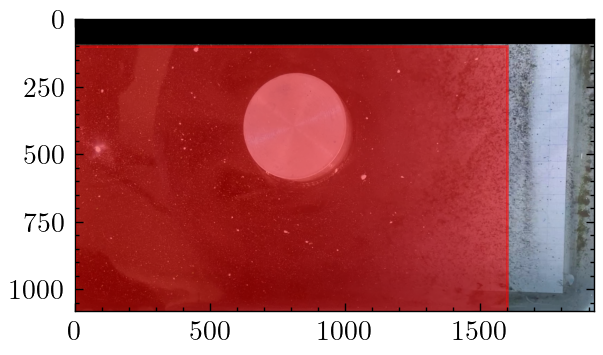

In [ ]:
#@title <font size="3"> CORRER SIEMPRE: PROPIEDADES DEL VIDEO Y RECORTE
from codigo.B_cortarFrame import get_frame_and_properties
from codigo.C_separar import crear_recorte_circular, crear_recorte_rectangular

save_as =  dir + os.sep + "cuadro.png"
print(video_path,save_as)

frame, properties = get_frame_and_properties(video_path, save_as, 1)

# PROPIEDADES
print(properties)
start =  0
stop =  int(properties["num_frames"]) - 1
fps = properties["fps"]

point, long = (0,100), 1600                 # <---- CAMBIAR ACÁ ----|
fig, ax = plt.subplots(dpi = 200)#
plt.imshow(frame)

# RECORTE CIRCULAR
#centro_px, radio_px = point, long
#pixel2cm = 2*radio_px / diametro_cm
#recorte = crear_recorte_circular(centro_px, radio_px)
#ax.add_patch(Circle(centro_px, radio_px, color = "r", alpha = 0.5));

# # RECORTE CUADRADO
width_px, height_px = long, long
anchor = point
pixel2cm = width_px / lado_cm
recorte = crear_recorte_rectangular(anchor, width_px, height_px)
ax.add_patch(Rectangle(anchor, width_px, height_px, color = "r", alpha = 0.5));


100%|██████████| 54/54 [00:25<00:00,  2.09it/s]


Se guardaron los cuadros en analisis/Planoe3/frames
Se guardaron los cuadros en analisis/Planoe3/masks


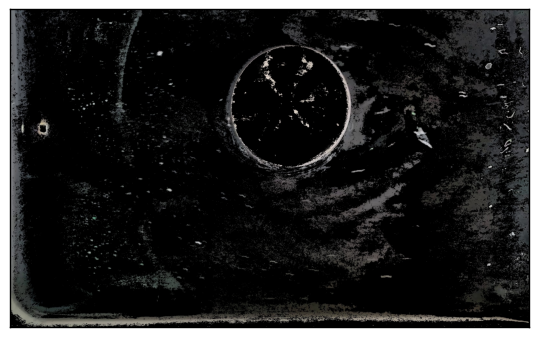

In [ ]:
#@title <font size="3"> CORRER SI NO ESTÁN GUARDADOS LOS FRAMES Y MASKS EN "frames" y "masks"
from codigo.C_separar import pre_process
frames_dir = dir + os.sep + "frames"
masks_dir = dir + os.sep + "masks"

pre_process(dir, video_file, frames_dir, masks_dir, start_at = start, stop_at = stop, method = "MOG2", crop = recorte)

img = np.asarray(Image.open(frames_dir + os.sep + os.listdir(frames_dir)[-1]))
plt.figure(figsize = (8.5*cm, 8.5*cm))
plt.yticks([])
plt.xticks([])
plt.imshow(img)
plt.savefig(dir + os.sep + id + "-frame.pdf", dpi = 150)
plt.show()

In [ ]:
#@title <font size="3"> CORRER SI NO ESTÁN GUARDADOS LOS DATOS DEL CAMPO
from codigo.D_calcularCampos import get_velocity_field, save_fields

campos_frames_dir = dir

#%%
ws = 32
ss = 32
ol = 16
threshold = 1

#%% Frames
T, x, y, U, V = get_velocity_field(start = start, stop = stop, path = frames_dir + os.sep, fps = fps, pixel2cm = pixel2cm, winsize = ws, searchsize = ss, overlap = ol, threshold = threshold)

save_fields(campos_frames_dir, T, x, y, U, V)

100%|██████████| 53/53 [01:31<00:00,  1.72s/it]


Datos guardados en: 'analisis/Planoe3/campos.npz


In [ ]:
#@title <font size="3"> PROCESAR CAMPOS (PROMEDIAR EN EL TIEMPO)
from codigo.E_procesarCampos import load_data, frame_interval_average, get_center, get_velocity_in_polar_coords, cmap
from codigo.F_ajustes import burgers, rankine, lineal, chi2_reducido

T, x, y, U, V = load_data(dir + os.sep + "campos.npz")
T, x, y, U, V, U_err, V_err = frame_interval_average(T, x, y, U, V, None)

u, v, u_err, v_err = U[0], V[0], U_err[0], V_err[0]
center, center_err = get_center(x, y, u, v, percentile = 0.1)

num_bins = int(radio_cm / 0.1)
r, vr, vt, vr_err, vt_err = get_velocity_in_polar_coords(x, y, u, v, u_err, v_err, center, num_bins = num_bins)

rlim = 4
cond_r = r < rlim

# AJUSTES BURGERS y RANKINE
popt_b, pcov_b = curve_fit(burgers, r[cond_r], vt[cond_r], bounds = [(0, 0), (np.infty, np.infty)], sigma = vt_err[cond_r])
popt_r, pcov_r = curve_fit(rankine, r[cond_r], vt[cond_r], bounds = [(0, 0), (np.infty, np.infty)], sigma = vt_err[cond_r])
perr_b = np.sqrt(np.diag(pcov_b))
perr_r = np.sqrt(np.diag(pcov_r))
chi2_b = chi2_reducido(r[cond_r], vt[cond_r], burgers, popt_b, y_err = vt_err[cond_r])
chi2_r = chi2_reducido(r[cond_r], vt[cond_r], rankine, popt_r, y_err = vt_err[cond_r])

# AJUSTES VELOCIDAD RADIAL
p = linregress(r[cond_r], vr[cond_r])
popt_vr, pcov_vr = curve_fit(lineal, r[cond_r], vr[cond_r], sigma = vr_err[cond_r])
perr_vr = np.sqrt(np.diag(pcov_vr))

# GUARDAR INFO IMPORTANTE
saveparams = f"{id} \n \
\nConfiguración: \n \
point, long = {point}, {long} \n \
rlim     = {rlim} \n \
num_bins = {num_bins} \n \
\nAjustes vel. tangencial: \n \
Gamma_b  = {popt_b[0]:.4f} ± {perr_b[0]:.4f} \n \
a_b      = {popt_b[1]:.4f} ± {perr_b[1]:.4f} \n \
chi2_b   = {chi2_b:.4f} \n \
Gamma_r  = {popt_r[0]:.4f} ± {perr_r[0]:.4f} \n \
a_r      = {popt_r[1]:.4f} ± {perr_r[1]:.4f} \n \
chi2_r   = {chi2_r:.4f} \n \
\nAjustes vel. radial: \n \
r        = {p.rvalue} \n \
alpha    = {popt_vr[0]:.4f} ± {perr_vr[0]:.4f}\n"

notas = open(dir + os.sep + id + ".txt", "w")
notas.write(saveparams)
notas.close()
print(saveparams)

Planoe3 
 
Configuración: 
 point, long = (0, 100), 1600 
 rlim     = 4 
 num_bins = 90 
 
Ajustes vel. tangencial: 
 Gamma_b  = 0.0000 ± 5.7311 
 a_b      = 23.0870 ± 0.0000 
 chi2_b   = 0.1623 
 Gamma_r  = 0.0000 ± 4.7144 
 a_r      = 21.0382 ± 0.0000 
 chi2_r   = 0.1623 
 
Ajustes vel. radial: 
 r        = 0.6107077987394223 
 alpha    = 0.0296 ± 0.0055



In [ ]:
#@title <font size="3"> GRÁFICOS FLUJO ESTACIONARIO (PROMEDIA SOBRE TODO EL TIEMPO)

rf = np.linspace(0, max(r), 500)    # r fino para los ajustes

# CAMPO
plt.figure(figsize = (8*cm, 8*cm))
ax = plt.axes(xlabel = r"$x$ [cm]", ylabel = r"$y$ [cm]")
col = ax.quiver(x, y, u, v, color = cmap(u, v, 'viridis'), scale = 25)
#ax.scatter(center[0], center[1], marker = "s", s = 2, color = "r")
ax.set_aspect("equal")
# prompt: quiero plotear un pequeño circulo
#circle = plt.Circle((2.5, 0.75), radius=0.1, color='r')
#ax.add_patch(circle)
cbar = fig.colorbar(col, ax = ax, location = "top", aspect = 1 / 0.055, fraction = 0.05, pad = 0.1, ticks = [0, 1])
cbar.set_ticklabels([r"$u_{\text{min}}$", r"$u_{\text{max}}$"])
plt.savefig(dir + os.sep + id + "-campo.pdf",dpi = 1050)
plt.show()



NameError: name 'np' is not defined

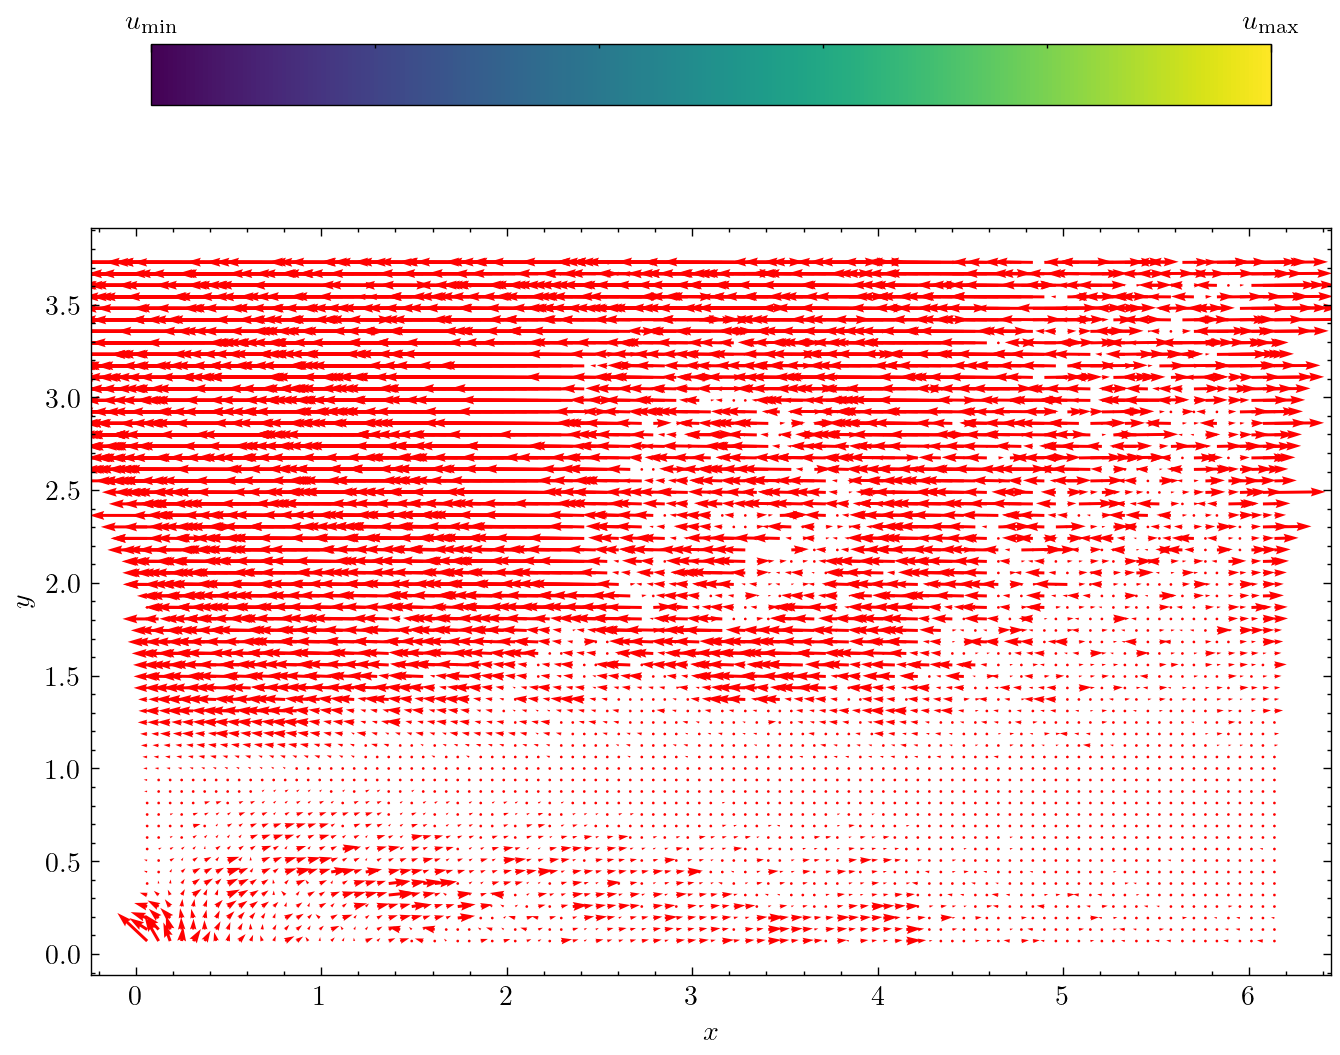

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate velocity components u and v based on the given equations
def fluid_velocity(x, y, U, a, C):
    r_squared = x**2 + y**2
    u = U * (1 - a**2 * x**2 - y**2) - C / (2 * np.pi) * y / r_squared
    v = -2 * U * a**2 * x * y / r_squared + C / (2 * np.pi) * x / r_squared
    return u, v

# Parameters for the fluid flow field

a = 0.1  # Parameter 'a'
C = 0.5  # Constant 'C'



# Calculate velocity components using the fluid_velocity function
u, v = fluid_velocity(x, y, U, a, C)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the quiver field
col = ax.quiver(x, y, u, v, color= 'red', scale=25)

# Set labels and aspect ratio
ax.set(xlabel=r"$x$", ylabel=r"$y$")
ax.set_aspect("equal")

# Add colorbar
cbar = fig.colorbar(col, ax=ax, location="top", aspect=1 / 0.055, fraction=0.05, pad=0.1, ticks=[0, 1])
cbar.set_ticklabels([r"$u_{\text{min}}$", r"$u_{\text{max}}$"])


plt.show()


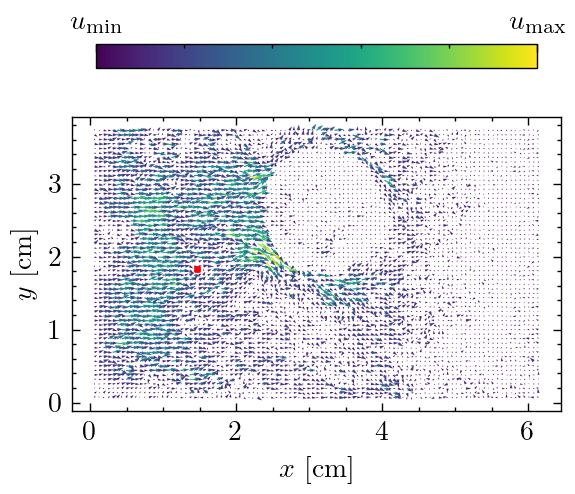

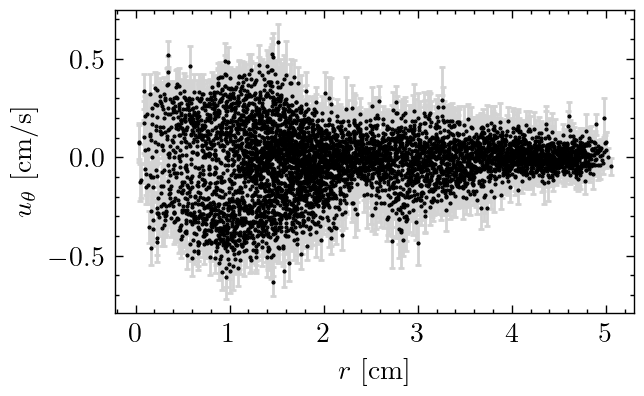

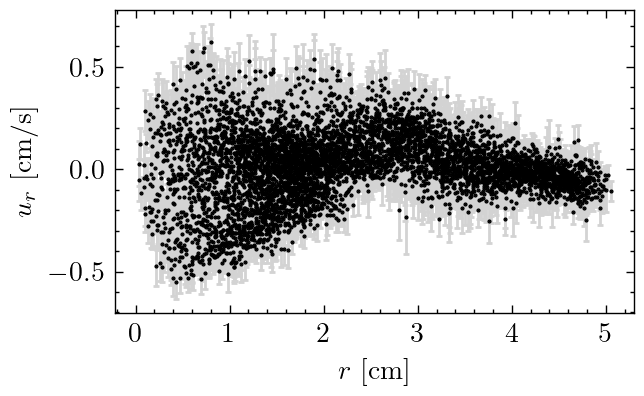

/content/drive/.shortcut-targets-by-id/118JYUXroIqW054F5eOLPzLWxDcE-6i0X/Labo 5/Fluidos/fluidos profe/Fluidos/codigo/F_ajustes.py:30: RuntimeWarning: invalid value encountered in divide
  return C *  (1 - np.exp(-r**2 / a**2)) / r


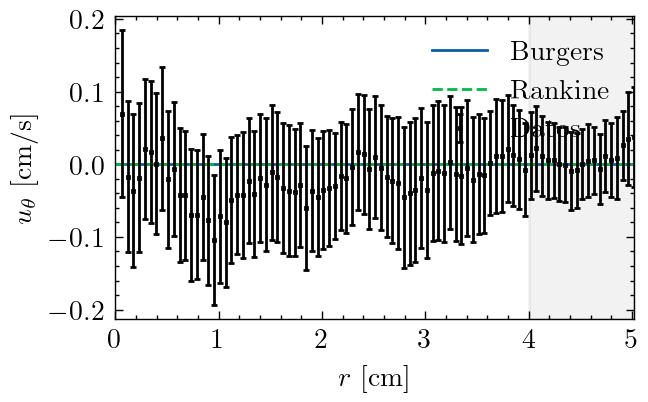

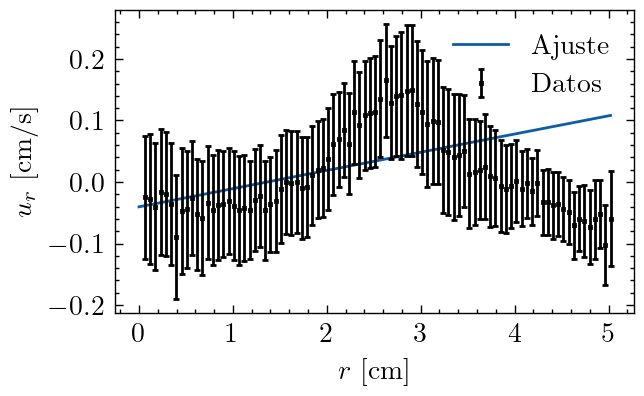

In [ ]:
#@title <font size="3"> GRÁFICOS FLUJO ESTACIONARIO (PROMEDIA SOBRE TODO EL TIEMPO)

rf = np.linspace(0, max(r), 500)    # r fino para los ajustes

# CAMPO
plt.figure(figsize = (8*cm, 8*cm))
ax = plt.axes(xlabel = r"$x$ [cm]", ylabel = r"$y$ [cm]")
col = ax.quiver(x, y, u, v, color = cmap(u, v, 'viridis'), scale = 25)
ax.scatter(center[0], center[1], marker = "s", s = 2, color = "r")
ax.set_aspect("equal")
cbar = fig.colorbar(col, ax = ax, location = "top", aspect = 1 / 0.055, fraction = 0.05, pad = 0.1, ticks = [0, 1])
cbar.set_ticklabels([r"$u_{\text{min}}$", r"$u_{\text{max}}$"])
plt.savefig(dir + os.sep + id + "-campo.pdf")
plt.show()

# TODOS LOS DATOS
r, vr, vt, vr_err, vt_err = get_velocity_in_polar_coords(x, y, u, v, u_err, v_err, center, num_bins = None)

plt.axes(xlabel = r"$r$ [cm]", ylabel = r"$u_{\theta}$ [cm/s]")
plt.errorbar(r, vt, yerr = vt_err, fmt = ".", ms = 0, capsize = 1, color = "lightgray")
plt.plot(r, vt, ".", ms = 1, color = "k")
plt.savefig(dir + os.sep + id + "-vt-all.pdf")
plt.show()

plt.axes(xlabel = r"$r$ [cm]", ylabel = r"$u_{r}$ [cm/s]")
plt.errorbar(r, vr, yerr = vr_err, fmt = ".", ms = 0, capsize = 1, color = "lightgray")
plt.plot(r, vr, ".", ms = 1, color = "k")
plt.savefig(dir + os.sep + id + "-vr-all.pdf")
plt.show()

# VEL TANGENCIAL + AJUSTES
r, vr, vt, vr_err, vt_err = get_velocity_in_polar_coords(x, y, u, v, u_err, v_err, center, num_bins = num_bins)

plt.axes(xlabel = r"$r$ [cm]", ylabel = r"$u_{\theta}$ [cm/s]", xlim = (0, max(r)))
plt.plot(rf, burgers(rf, *popt_b), label = "Burgers")
plt.plot(rf, rankine(rf, *popt_r), "--", label = "Rankine")
plt.errorbar(r, vt, yerr = vt_err, fmt = "s", ms = 1, capsize = 1, color = "k", label = "Datos")
plt.axvspan(rlim, max(r), color = "k", alpha = 0.05)
plt.legend(loc = "upper right")
plt.savefig(dir + os.sep + id + "-vt.pdf")
plt.show()

# VEL RADIAL + AJUSTE (BURGERS)
plt.axes(xlabel = r"$r$ [cm]", ylabel = r"$u_{r}$ [cm/s]")
plt.plot(rf, lineal(rf, *popt_vr), label = "Ajuste")
plt.errorbar(r, vr, yerr = vr_err, fmt = "s", ms = 1, capsize = 1, color = "k", label = "Datos")
plt.legend(loc = "upper right")
plt.savefig(dir + os.sep + id + "-vr.pdf")
plt.show()

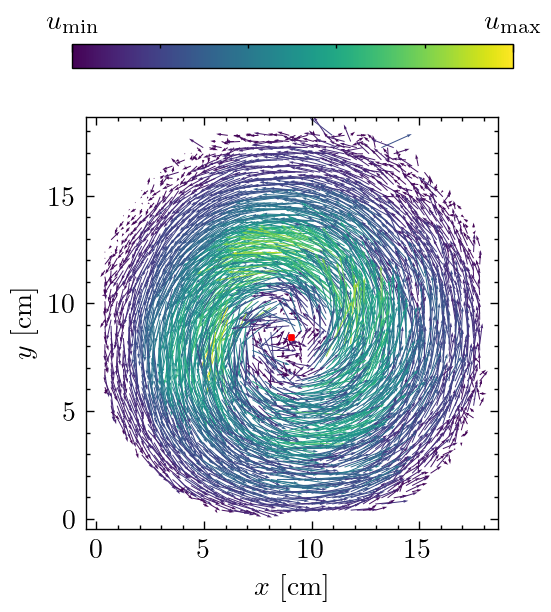

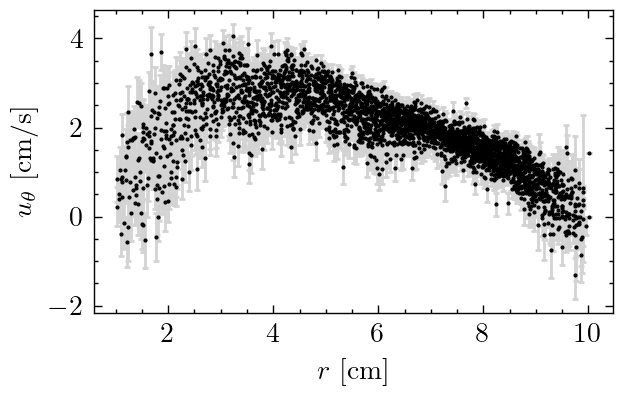

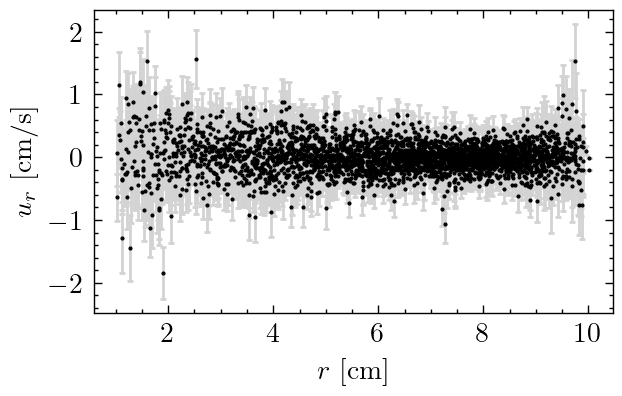

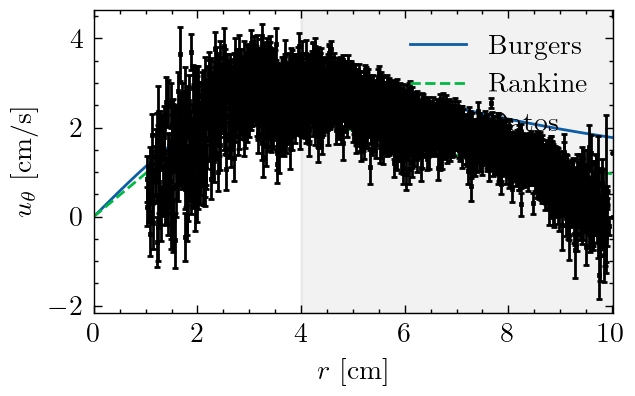

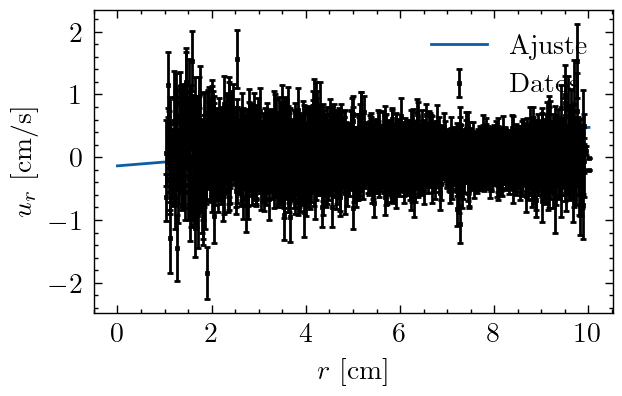

In [ ]:
# Import required libraries
import os
import numpy as np
import matplotlib.pyplot as plt

# Assuming these functions are defined elsewhere
# def get_velocity_in_polar_coords(x, y, u, v, u_err, v_err, center, num_bins=None):
# def burgers(r, *params):
# def rankine(r, *params):
# def lineal(r, *params):

# Skip radius
skip_radius = 1

# GRÁFICOS FLUJO ESTACIONARIO (PROMEDIA SOBRE TODO EL TIEMPO)
rf = np.linspace(0, max(r), 500)  # r fino para los ajustes

# CAMPO
plt.figure(figsize=(8 * cm, 8 * cm))
ax = plt.axes(xlabel=r"$x$ [cm]", ylabel=r"$y$ [cm]")
col = ax.quiver(x, y, u, v, color=cmap(u, v, 'viridis'), scale=25)
ax.scatter(center[0], center[1], marker="s", s=2, color="r")
ax.set_aspect("equal")
cbar = plt.colorbar(col, ax=ax, location="top", aspect=1 / 0.055, fraction=0.05, pad=0.1, ticks=[0, 1])
cbar.set_ticklabels([r"$u_{\text{min}}$", r"$u_{\text{max}}$"])
plt.savefig(dir + os.sep + id + "-campo.pdf")
plt.show()

# TODOS LOS DATOS
r_all, vr_all, vt_all, vr_err_all, vt_err_all = get_velocity_in_polar_coords(x, y, u, v, u_err, v_err, center, num_bins=None)

# Skip data points within the specified radius
filtered_indices = np.where(r_all > skip_radius)
r = r_all[filtered_indices]
vr = vr_all[filtered_indices]
vt = vt_all[filtered_indices]
vr_err = vr_err_all[filtered_indices]
vt_err = vt_err_all[filtered_indices]

plt.axes(xlabel = r"$r$ [cm]", ylabel = r"$u_{\theta}$ [cm/s]")
plt.errorbar(r, vt, yerr = vt_err, fmt = ".", ms = 0, capsize = 1, color = "lightgray")
plt.plot(r, vt, ".", ms = 1, color = "k")
plt.savefig(dir + os.sep + id + "-vt-all.pdf")
plt.show()

plt.axes(xlabel = r"$r$ [cm]", ylabel = r"$u_{r}$ [cm/s]")
plt.errorbar(r, vr, yerr = vr_err, fmt = ".", ms = 0, capsize = 1, color = "lightgray")
plt.plot(r, vr, ".", ms = 1, color = "k")
plt.savefig(dir + os.sep + id + "-vr-all.pdf")
plt.show()

# VEL TANGENCIAL + AJUSTES

plt.axes(xlabel = r"$r$ [cm]", ylabel = r"$u_{\theta}$ [cm/s]", xlim = (0, max(r)))
plt.plot(rf, burgers(rf, *popt_b), label = "Burgers")
plt.plot(rf, rankine(rf, *popt_r), "--", label = "Rankine")
plt.errorbar(r, vt, yerr = vt_err, fmt = "s", ms = 1, capsize = 1, color = "k", label = "Datos")
plt.axvspan(rlim, max(r), color = "k", alpha = 0.05)
plt.legend(loc = "upper right")
plt.savefig(dir + os.sep + id + "-vt.pdf")
plt.show()

# VEL RADIAL + AJUSTE (BURGERS)
plt.axes(xlabel = r"$r$ [cm]", ylabel = r"$u_{r}$ [cm/s]")
plt.plot(rf, lineal(rf, *popt_vr), label = "Ajuste")
plt.errorbar(r, vr, yerr = vr_err, fmt = "s", ms = 1, capsize = 1, color = "k", label = "Datos")
plt.legend(loc = "upper right")
plt.savefig(dir + os.sep + id + "-vr.pdf")
plt.show()


NameError: name 'r' is not defined

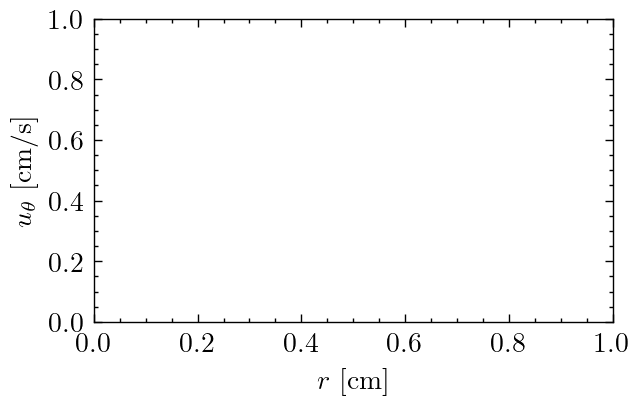

In [ ]:
#@title <font size="3"> GRÁFICO CAMPO DISIPADO

from codigo.E_procesarCampos import load_data, frame_interval_average, get_center, get_velocity_in_polar_coords
from codigo.F_ajustes import disipacion_rankine, disipacion_potencial

cmap = colormaps["viridis"]

frame_interval =  int(2*fps)
num_bins = int(radio_cm / 0.1)

T, x, y, U, V = load_data(dir + os.sep + "campos.npz")
T, x, y, U, V, U_err, V_err = frame_interval_average(T, x, y, U, V, frame_interval)

# Evolucion de la velocidad tangencial en el tiempo
plt.figure()
ax = plt.axes(xlabel = r"$r$ [cm]", ylabel = r"$u_{\theta}$ [cm/s]")
for i, (t, u, v, v_err, u_err) in enumerate(zip(T, U, V, U_err, V_err)):
    center, center_err = get_center(x, y, u, v, percentile = 0.1)
    r, vr, vt, vr_err, vt_err = get_velocity_in_polar_coords(x, y, u, v, u_err, v_err, center, num_bins = num_bins)

    col = i / len(T)
    plt.fill_between(r, vt - vt_err, vt + vt_err, color = cmap(col), alpha = 0.5, edgecolor = None, interpolate = True)
    plt.plot(r, vt, color = cmap(col), label = f"{t:.0f} s")

ax.set_xlim(0, max(r))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol = 7)
plt.savefig(dir + os.sep + id + f"-disipacion.pdf")
plt.show()

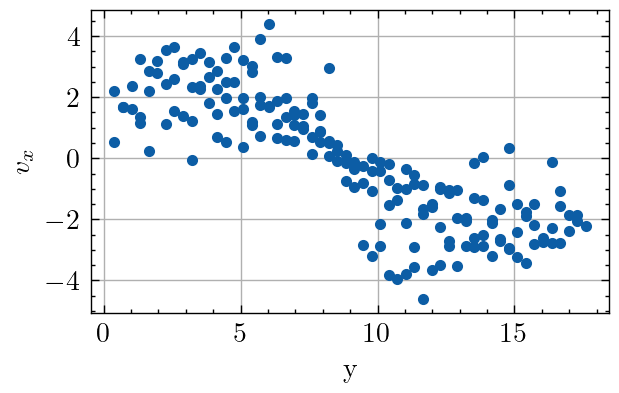

In [ ]:
y_1 = y[::15]
U_1 = U[0][::15]
plt.plot(y_1, U_1, '.')
plt.xlabel("y")
plt.ylabel("$v_x$")
plt.grid()

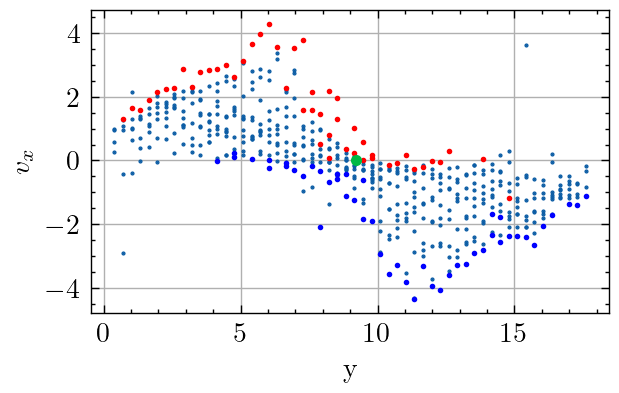

In [ ]:
# prompt: Could you add findpeaks to the last cell code for the plot of y and U
#!pip install findpeaks
from scipy.signal import find_peaks

y_1 = y[::5]
U_1 = U[0][::5]
peaks, _ = find_peaks(U_1, prominence=0.5, width=1)
valleys, _ = find_peaks(-U_1, prominence=0.5, width=1)

# Plot the data, peaks, and valleys
plt.plot(y_1, U_1, '.', markersize=1)
plt.plot(y_1[peaks], U_1[peaks], 'ro', markersize=1)
plt.plot(y_1[valleys], U_1[valleys], 'bo', markersize=1)
plt.plot(9.2,0,".")
plt.xlabel("y")
plt.ylabel("$v_x$")
plt.grid()
plt.show()

ypico=6.5


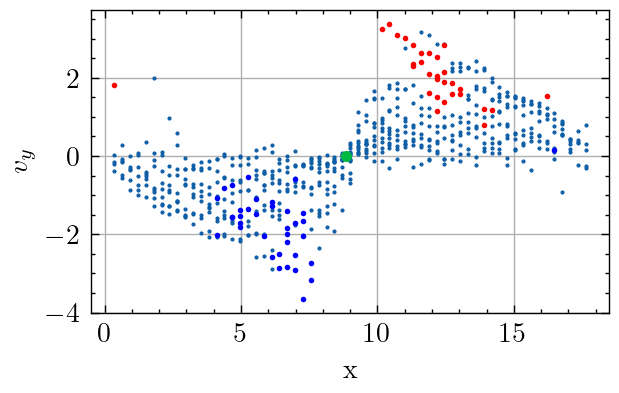

In [ ]:
# prompt: Could you add findpeaks to the last cell code for the plot of y and U
#!pip install findpeaks
from scipy.signal import find_peaks

x_1 = x[::5]
V_1 = V[0][::5]
peaks, _ = find_peaks(V_1, prominence=1, width=1)
valleys, _ = find_peaks(-V_1, prominence=1, width=1)

# Plot the data, peaks, and valleys
plt.plot(x_1, V_1, '.', markersize=1)
plt.plot(x_1[peaks], V_1[peaks], 'ro', markersize=1)
plt.plot(x_1[valleys], V_1[valleys], 'bo', markersize=1)
plt.plot(8.85,0,".")
plt.xlabel("x")
plt.ylabel("$v_y$")
plt.grid()
plt.show()

ypico=8.9


In [ ]:
#@title <font size="3"> PROCESAR CAMPOS (DISIPADOS) AJUSTE MONSTRUOSIDAD
from codigo.E_procesarCampos import load_data, frame_interval_average, get_center, get_velocity_in_polar_coords, cmap
from codigo.F_ajustes import disipacion_rankine, disipacion_potencial, disipacion_contornos

cmap = colormaps["viridis"]

T, x, y, U, V = load_data(dir + os.sep + "campos.npz")

dt = 2
frame_interval = int((dt)*fps)
T, x, y, U, V, U_err, V_err = frame_interval_average(T, x, y, U, V, frame_interval)

num_bins = int(radio_cm / 0.1)
rs, vrs, vts, vr_errs, vt_errs = [], [], [], [], []
for i, (t, u, v, v_err, u_err) in enumerate(zip(T, U, V, U_err, V_err)):
    center, center_err = get_center(x, y, u, v, percentile = 0.1)
    r, vr, vt, vr_err, vt_err = get_velocity_in_polar_coords(x, y, u, v, u_err, v_err, center, num_bins = num_bins)
    rs.append(r)
    vrs.append(vr)
    vts.append(vt)
    vr_errs.append(vr_err)
    vt_errs.append(vt_err)

arr1 = rs[0]
r1 = np.max(arr1)
arr2 = rs[1] + r1
r2 = np.max(arr2)
arr3 = rs[2] + r2
r3 = np.max(arr3)
arr4 = rs[3] + r3
r4 = np.max(arr4)
arr5 = rs[4] + r4
r5 = np.max(arr5)
arr6 = rs[5] + r5
r6 = np.max(arr6)
arr7 = rs[6] + r6

rlim = 4
r_aj = np.hstack([arr1[rs[0] < rlim], arr2[rs[1] < rlim], arr3[rs[2] < rlim], arr4[rs[3] < rlim], arr5[rs[4] < rlim], arr6[rs[5] < rlim], arr7[rs[6] < rlim]])
vt_aj = np.hstack([vts[0][rs[0] < rlim], vts[1][rs[1] < rlim], vts[2][rs[2] < rlim], vts[3][rs[3] < rlim], vts[4][rs[4] < rlim], vts[5][rs[5] < rlim], vts[6][rs[6] < rlim]])
sigma_aj = np.hstack([vt_errs[0][rs[0] < rlim], vt_errs[1][rs[1] < rlim], vt_errs[2][rs[2] < rlim], vt_errs[3][rs[3] < rlim], vt_errs[4][rs[4] < rlim], vt_errs[5][rs[5] < rlim], vt_errs[6][rs[6] < rlim]])

def func_ajuste_monstruo(r, t0, omega, c, n):
    r_ext = radio_cm
    c1   = r <= r1
    res1 = disipacion_rankine(r[c1], t0, omega, c, n, beta = 0.01)
    c2   = np.logical_and(r > r1, r <= r2)
    res2 = disipacion_rankine(r[c2] - r1, t0 + 1*(dt), omega, c, n, beta = 0.01)
    c3   = np.logical_and(r > r2, r <= r3)
    res3 = disipacion_rankine(r[c3] - r2, t0 + 2*(dt), omega, c, n, beta = 0.01)
    c4   = np.logical_and(r > r3, r <= r4)
    res4 = disipacion_rankine(r[c4] - r3, t0 + 3*(dt), omega, c, n, beta = 0.01)
    c5   = np.logical_and(r > r4, r <= r5)
    res5 = disipacion_rankine(r[c5] - r4, t0 + 4*(dt), omega, c, n, beta = 0.01)
    c6   = np.logical_and(r > r5, r <= r6)
    res6 = disipacion_rankine(r[c6] - r5, t0 + 5*(dt), omega, c, n, beta = 0.01)
    c7   = r > r6
    res7 = disipacion_rankine(r[c7] - r6, t0 + 6*(dt), omega, c, n, 0.01)
    return np.hstack([res1, res2, res3, res4, res5, res6, res7])

h = 1.5
h1 = rs[0]
h2 = rs[1] + max(h1) + h
h3 = rs[3] + max(h2) + h
h4 = rs[6] + max(h3) + h

plt.figure(figsize = (18*cm, 3.5*cm))
plt.axes(xlabel = r"$r$ [cm]", ylabel = r"$u_{\theta}$ [cm/s]")
popt_m, pcov_m = curve_fit(func_ajuste_monstruo, r_aj, vt_aj, bounds = ([0]*4, [np.infty]*4), sigma = sigma_aj)

plt.errorbar(h1, vts[0], yerr = vt_errs[0], fmt = ".", ms = 1, capsize = 1, color = cmap(0/7), zorder = -1, alpha = 0.5)
plt.text(np.mean(h1), 4.5, s = f"{T[0]:.0f} s", horizontalalignment='center')

plt.errorbar(h2, vts[1], yerr = vt_errs[1], fmt = ".", ms = 1, capsize = 1, color = cmap(1/7), zorder = -1, alpha = 0.5)
plt.text(np.mean(h2), 4.5, s = f"{T[1]:.0f} s", horizontalalignment='center')

plt.errorbar(h3, vts[3], yerr = vt_errs[3], fmt = ".", ms = 1, capsize = 1, color = cmap(3/7), zorder = -1, alpha = 0.5)
plt.text(np.mean(h3), 4.5, s = f"{T[3]:.0f} s", horizontalalignment='center')

plt.errorbar(h4, vts[6], yerr = vt_errs[6], fmt = ".", ms = 1, capsize = 1, color = cmap(6/7), zorder = -1, alpha = 0.5)
plt.text(np.mean(h4), 4.5, s = f"{T[6]:.0f} s", horizontalalignment='center')

plt.plot(h1, func_ajuste_monstruo(arr1, *popt_m), color = "k", lw = 1.5, zorder = 1)
plt.plot(h2, func_ajuste_monstruo(arr2, *popt_m), color = "k", lw = 1.5, zorder = 1)
plt.plot(h3, func_ajuste_monstruo(arr4, *popt_m), color = "k", lw = 1.5, zorder = 1)
plt.plot(h4, func_ajuste_monstruo(arr7, *popt_m), color = "k", lw = 1.5, zorder = 1)
ticks = [min(h1), min(h1) + 4,
         min(h2), min(h2) + 4,
         min(h3), min(h3) + 4,
         min(h4), min(h4) + 4]
labels = [0, 4,
          0, 4,
          0, 4,
          0, 4]

plt.xticks(ticks, labels)
plt.minorticks_off()
plt.xlim(min(h1) - h/2, max(h4) + h/2)
plt.axvline(min(h1) - h/2, color = "k", lw = 0.5, alpha = 1)
plt.axvline(min(h2) - h/2, color = "k", lw = 0.5, alpha = 1)
plt.axvline(min(h3) - h/2, color = "k", lw = 0.5, alpha = 1)
plt.axvline(min(h4) - h/2, color = "k", lw = 0.5, alpha = 1)
plt.savefig(dir + os.sep + id + f"-ajustedisip.pdf")
plt.show()

t0, omega, c, nu = popt_m
print("t0, omega, c, nu:", t0, omega, c, nu)
rf = np.linspace(min(r), max(r), 1000)


plt.figure()
ax = plt.axes(xlabel = r"$r$ [cm]", ylabel = r"$u_{\theta}$ [cm/s]")
T = T - T[0] + t0
for i, (t, r, vr, vt, vr_err, vt_err) in enumerate(zip(T, rs, vrs, vts, vr_errs, vt_errs)):
    if (i) % 3 == 0 or i == 1:
        alpha = i / 7
        plt.fill_between(r, vt - vt_err, vt + vt_err, color = cmap(alpha), alpha = 0.2, interpolate = True)
        plt.plot(rf, disipacion_rankine(rf, t, omega, c, nu, beta = 0.01), color = cmap(alpha), label = f"{t:.0f} s", ls = "--", lw = 1.5)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=4)
plt.savefig(dir + os.sep + id + f"-disip4.pdf")

saveparams = f"{id} \n \
    \nConfiguración: \n \
    point, long     = {point}, {long} \n \
    rlim     = {rlim} \n \
    num_bins = {num_bins} \n \
    \nAjustes vel. tangencial: \n \
    Gamma_b  = {popt_b[0]:.4f} ± {perr_b[0]:.4f} \n \
    a_b      = {popt_b[1]:.4f} ± {perr_b[1]:.4f} \n \
    chi2_b   = {chi2_b:.4f} \n \
    Gamma_r  = {popt_r[0]:.4f} ± {perr_r[0]:.4f} \n \
    a_r      = {popt_r[1]:.4f} ± {perr_r[1]:.4f} \n \
    chi2_r   = {chi2_r:.4f} \n \
    \nAjustes vel. radial: \n \
    r        = {p.rvalue} \n \
    alpha    = {popt_vr[0]:.4f} ± {perr_vr[0]:.4f} \n \
    \n Ajuste disipación: \n \
    t0, Gamma, c, nu = {popt_m} ± {np.sqrt(np.diag(pcov_m))}"

notas = open(dir + os.sep + id + ".txt", "w")
notas.write(saveparams)
notas.close()

print(chi2_reducido(r_aj, vt_aj, func_ajuste_monstruo, popt_m, y_err = sigma_aj))

IndexError: list index out of range